In [1]:
from utils.dawnfrb import FRBInfo

catalog = FRBInfo(
    '/mnt/c/Users/findm/Desktop/surf2023/waterfall_data/data/',
    '/mnt/c/Users/findm/Desktop/surf2023/waterfall_data/2023data/data/'
)

In [40]:
spec = catalog['spec']

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

catalog1path = '/home/jovyan/work/chime_data/21.0007/'
catalog2path = '/home/jovyan/work/chime_data/23.0004/'

csv1 = glob.glob(catalog1path+'*.csv')
catalog = pd.read_csv(csv1[0])
catalog['catalog'] = [1]*len(catalog)

if catalog2path:
    csv2 = glob.glob(catalog2path+'*.csv')
    catalog2 = pd.read_csv(csv2[0])
    catalog2['catalog'] = [2]*len(catalog2)
    filepaths2 = glob.glob(catalog2path+'*.h5')
    catalog = pd.concat([catalog,catalog2])

Text(0.5, 0, 'days')

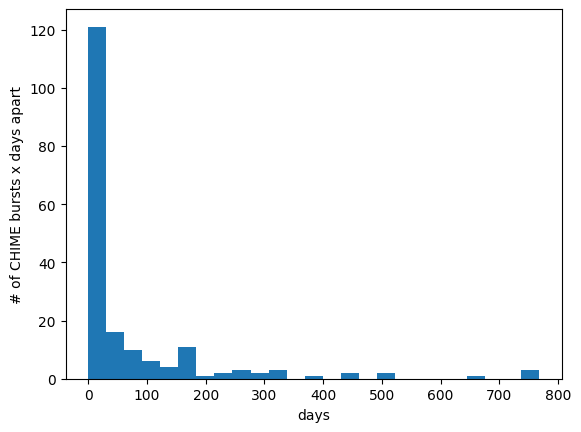

In [8]:
a = catalog[['tns_name','repeater_name','mjd_400']]
repeaters = np.unique(a[a['repeater_name']!='-9999'].reset_index(drop=True).repeater_name.values)
separation_days = []
for r in repeaters:
    burst_times = sorted(a[a.repeater_name == r].mjd_400.values)
    separation_days += list(np.diff(burst_times))
plt.hist(separation_days,bins=25)
plt.ylabel('# of CHIME bursts x days apart')
plt.xlabel('days')

188